In [8]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

from tqdm import tqdm_notebook   # pip install tqdm
from libs import stock_daum, stock_naver

In [9]:
# https://matplotlib.org/gallery/ticks_and_spines/tick-formatters.html
from matplotlib.ticker import FuncFormatter

## 코스피 종목코드 수집

+ 코스피 종목코드 : https://gist.github.com/allieus/733725662c644ab56c9db9d3cdf77ed1

In [10]:
# 코스피 지수 CSV를 읽어들입니다.
kospi_df = pd.read_csv("https://goo.gl/XpZH4y", index_col='종목명', dtype={'종목코드': str})
print(kospi_df.shape)
kospi_df.head()

(768, 1)


,종목코드
종목명,
미원에스씨,268280
경동도시가스,267290
넷마블게임즈,251270
아이엔지생명,079440
현대건설기계,267270


In [11]:
kospi_series = kospi_df['종목코드']

## 3개 종목의 일별 거래량 크롤링

In [12]:
code = kospi_series['삼성전자']
삼성전자_volume_df = pd.concat(stock_naver.get_종목별_일별_거래량(code, max_page=5))

code = kospi_series['LG전자']
LG전자_volume_df = pd.concat(stock_naver.get_종목별_일별_거래량(code, max_page=5))

code = kospi_series['SK하이닉스']
SK하이닉스_volume_df = pd.concat(stock_naver.get_종목별_일별_거래량(code, max_page=5))

In [13]:
df = pd.DataFrame({
    '삼성전자': 삼성전자_volume_df['종가'],
    'LG전자': LG전자_volume_df['종가'],
    'SK하이닉스': SK하이닉스_volume_df['종가'],
})
print(df.shape)
df.head()

(100, 3)


,삼성전자,LG전자,SK하이닉스
날짜,,,
2018-11-26,42600.0,71200.0,70900.0
2018-11-23,42400.0,69400.0,69300.0
2018-11-22,42450.0,69200.0,69300.0
2018-11-21,42100.0,69700.0,68100.0
2018-11-20,42800.0,70500.0,67500.0


## 시각화

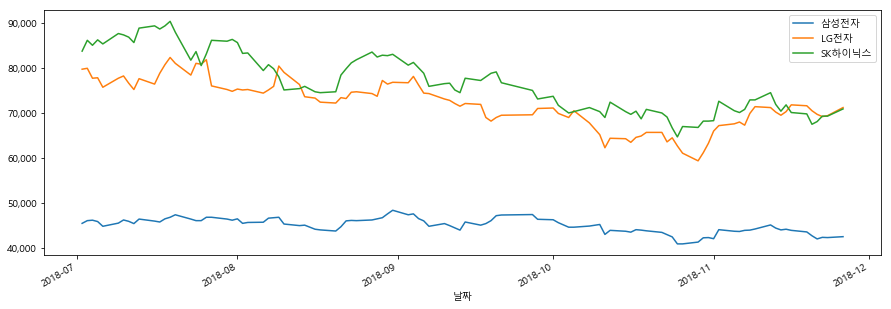

In [14]:
ax = df.plot(figsize=(15, 5))
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, pos: '{:,}'.format(int(y))))